<a href="https://colab.research.google.com/github/arnautoleg/Trifan_Valentina/blob/main/Trifan_Valenina_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/Trifan_Valentina_BAZA.xlsx')

In [ ]:
df.columns

Index(['ID', 'Zona', 'Localitatea', 'Clasa', 'Genul', 'Dupa_Virsta',
       'Locuinta', 'Studii_mama', 'Studii_tata', 'Parintii_statut',
       'Durere_dentara', 'Dinte_sensibil', 'Lipsa_dintelui', 'Pozitie_dentara',
       'CB_ulcer', 'CB_hemoragii', 'Dureri_gingie', 'Respiratie_dificila',
       'Dintii_culoare', 'Spatii_dentare', 'Halena', 'Fracturi_dentare',
       'Discomfort_frecventa', 'Dereglari', 'Dereglari_zimbetul',
       'Dereglari_fonatia', 'Dereglari_relaxarea', 'Dereglari_scolarizare',
       'Dereglari_activitati_scolare', 'Dereglari_emotii', 'Dereglari_igiena',
       'Dereglari_alimentarea', 'Obicei_vicios_prezenta', 'Obicei_vicios_comp',
       'Deget_supt'],
      dtype='object')

In [ ]:
df.drop(['ID','Dereglari'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Zona                          1710 non-null   object
 1   Localitatea                   1710 non-null   object
 2   Clasa                         1710 non-null   int64 
 3   Genul                         1710 non-null   object
 4   Dupa_Virsta                   1710 non-null   int64 
 5   Locuinta                      1710 non-null   object
 6   Studii_mama                   1710 non-null   object
 7   Studii_tata                   1710 non-null   object
 8   Parintii_statut               1710 non-null   object
 9   Durere_dentara                1710 non-null   object
 10  Dinte_sensibil                1710 non-null   object
 11  Lipsa_dintelui                1710 non-null   object
 12  Pozitie_dentara               1710 non-null   object
 13  CB_ulcer          

#Function for bar plots with 95%CI

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

def bar_plot_cat (el, df):

  # Calculate percentage for each category
  percentage_data = (df[el].value_counts(normalize=True, sort=False).sort_index() * 100).reset_index()
  percentage_data.columns = [el, 'Procente']

  # Calculate confidence intervals for each category
  ci_data = df[el].value_counts().apply(lambda x: proportion_confint(x, len(df), method='normal')).reset_index()
  ci_data.columns = [el, 'CI']

  # Unpack the tuple into separate columns for lower and upper bounds
  ci_data[['CI_Lower', 'CI_Upper']] = pd.DataFrame(ci_data['CI'].tolist(), index=ci_data.index)

  # Drop the original CI column
  ci_data = ci_data.drop(columns=['CI'])

  # Merge percentage and CI data
  merged_data = pd.merge(percentage_data, ci_data, on=el)

  # Create bar plot using seaborn
  plt.figure(figsize=(8, 6))
  sns.set(style="whitegrid")
  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")

  # Set y-axis range to be from 0 to 100
  ax.set_ylim(0, 100)


  # Add percentage and 95% confidence intervals as text annotations
  for i, row in merged_data.iterrows():
     percentage = row['Procente']
     lower_ci = row['CI_Lower'] * 100
     upper_ci = row['CI_Upper'] * 100
     if len(df[el].value_counts().index) <= 3:
      plt.text(i, percentage, f'{percentage:.1f}% [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
     else:
      plt.text(i, percentage, f'{percentage:.1f}%\n [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
  #plt.title('Bar Plot Frecventele relative cu 95% IC')
  plt.show()
#“normal”, “agresti_coull”, “beta”, “wilson”, “binom_test”

In [ ]:
df.columns

Index(['Zona', 'Localitatea', 'Clasa', 'Genul', 'Dupa_Virsta', 'Locuinta',
       'Studii_mama', 'Studii_tata', 'Parintii_statut', 'Durere_dentara',
       'Dinte_sensibil', 'Lipsa_dintelui', 'Pozitie_dentara', 'CB_ulcer',
       'CB_hemoragii', 'Dureri_gingie', 'Respiratie_dificila',
       'Dintii_culoare', 'Spatii_dentare', 'Halena', 'Fracturi_dentare',
       'Discomfort_frecventa', 'Dereglari_zimbetul', 'Dereglari_fonatia',
       'Dereglari_relaxarea', 'Dereglari_scolarizare',
       'Dereglari_activitati_scolare', 'Dereglari_emotii', 'Dereglari_igiena',
       'Dereglari_alimentarea', 'Obicei_vicios_prezenta', 'Obicei_vicios_comp',
       'Deget_supt'],
      dtype='object')

In [ ]:
df

,Zona,Localitatea,Clasa,Genul,Dupa_Virsta,Locuinta,Studii_mama,Studii_tata,Parintii_statut,Durere_dentara,...,Dereglari_fonatia,Dereglari_relaxarea,Dereglari_scolarizare,Dereglari_activitati_scolare,Dereglari_emotii,Dereglari_igiena,Dereglari_alimentarea,Obicei_vicios_prezenta,Obicei_vicios_comp,Deget_supt
0,Cahul,sat,8,B,1,parintii,scoala medie,scoala medie,muncitori,Nu,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Da,Da
1,Cahul,sat,8,F,2,mama,scoala medie,nu stiu,altele,Da,...,Nu,Nu,Nu,Da,Nu,Nu,Nu,Da,Da,Da
2,Cahul,sat,8,F,1,mama,scoala medie,nu stiu,altele,Nu,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Da,Da
3,Cahul,sat,8,B,1,tata,scoala medie,scoala medie,intelectuali,Nu stiu,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Da
4,Cahul,sat,8,B,1,parintii,scoala medie,scoala medie,intelectuali,Nu stiu,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Cahul,sat,9,B,1,parintii,scoala medie,scoala medie,intelectuali,Da,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu
1706,Cahul,sat,9,B,1,altele,nu stiu,nu stiu,altele,Nu stiu,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu
1707,Cahul,sat,9,B,1,parintii,superioare,nu stiu,muncitori,Nu,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu
1708,Cahul,sat,9,B,1,parintii,studii medii,superioare,intelectuali,Nu,...,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu,Nu


In [ ]:
df['Zona']=df['Zona'].replace(['cahul '], ['Cahul'])

In [ ]:
df['Zona'].value_counts()

Cahul       705
Straseni    415
Soroca      380
Calarasi    210
Name: Zona, dtype: int64

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


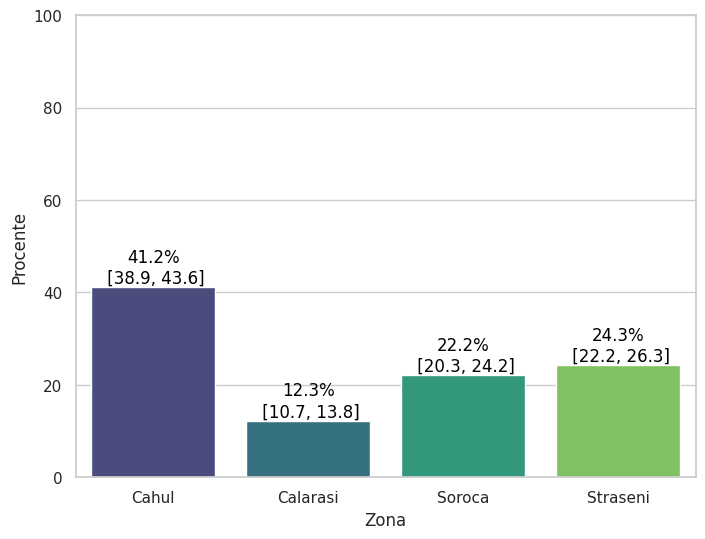

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


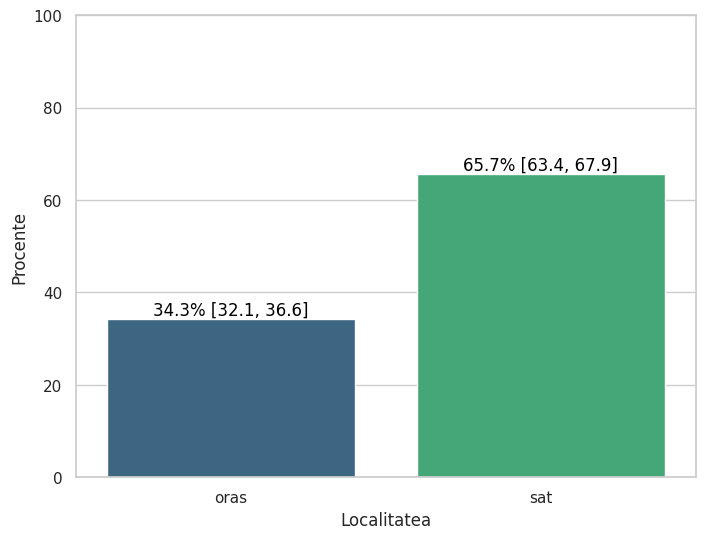

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


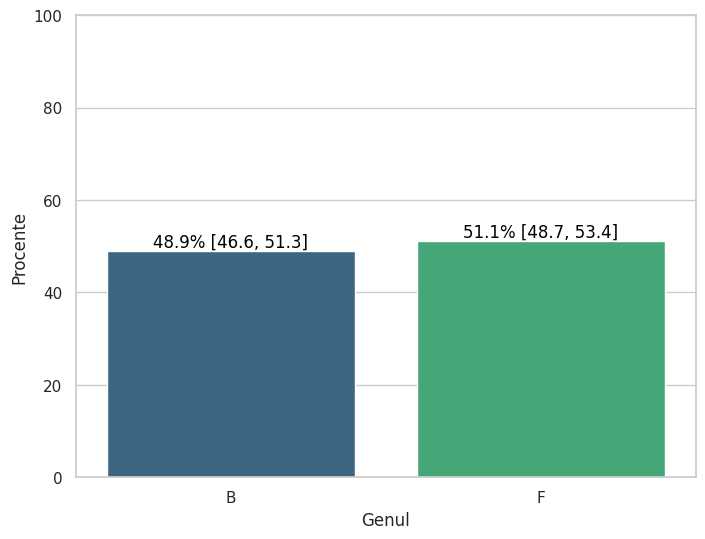

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


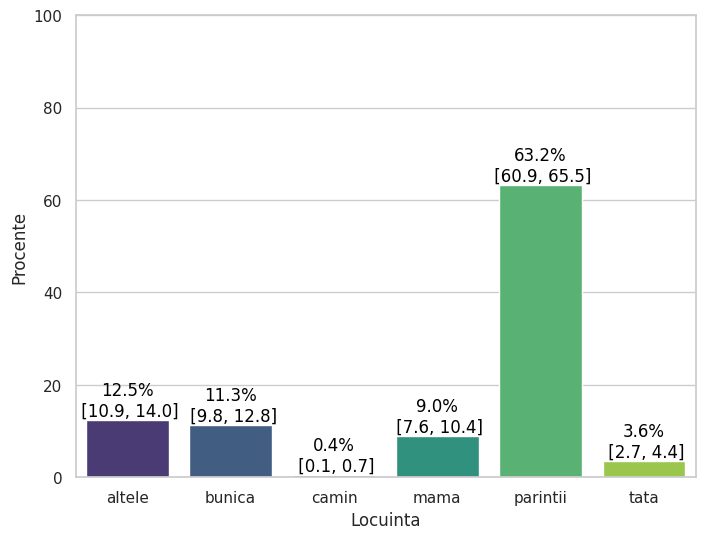

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


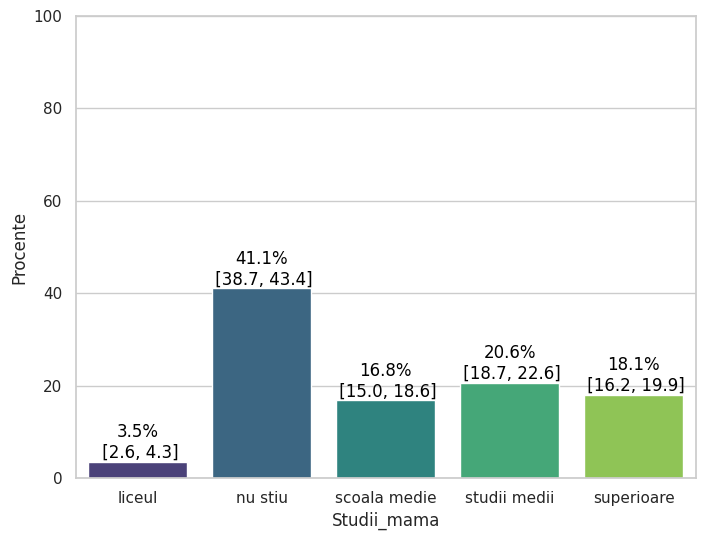

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


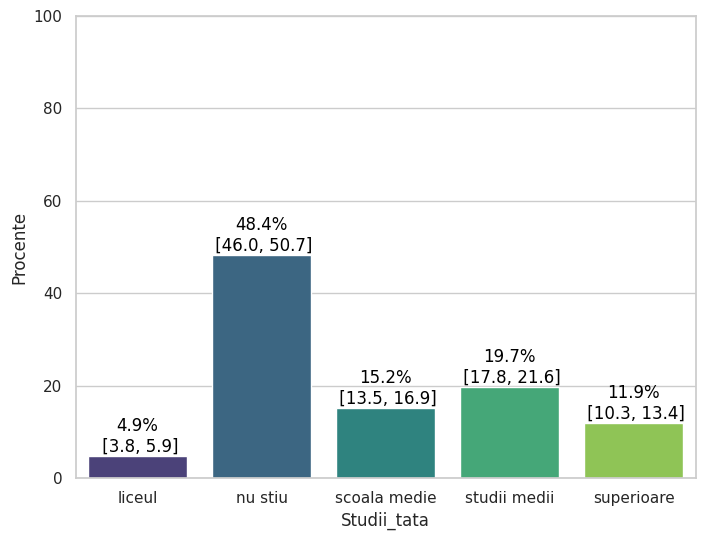

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


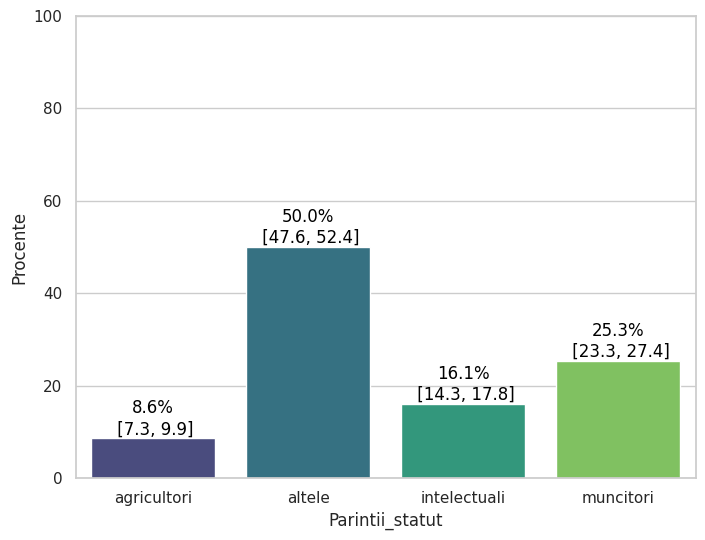

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


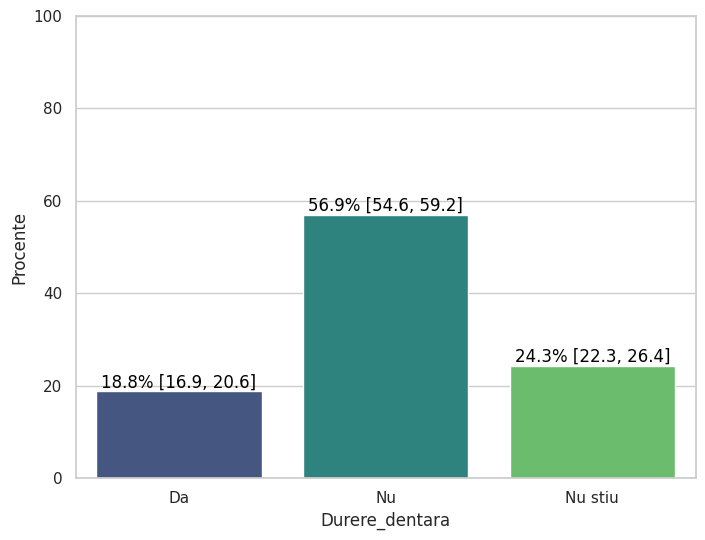

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


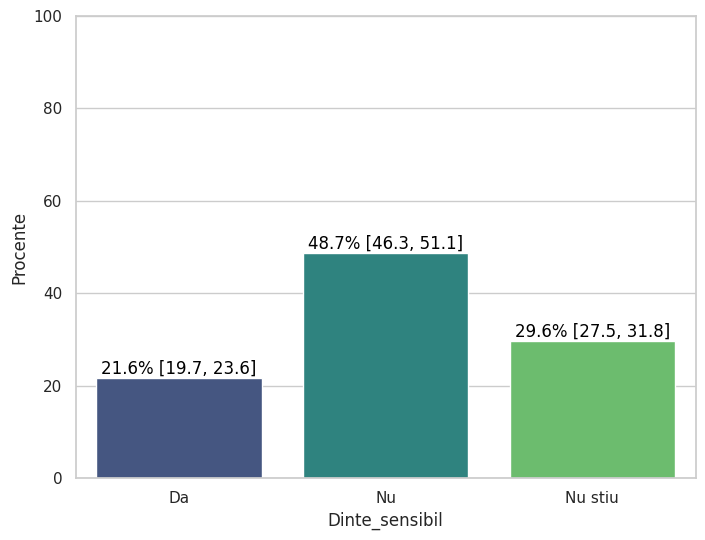

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


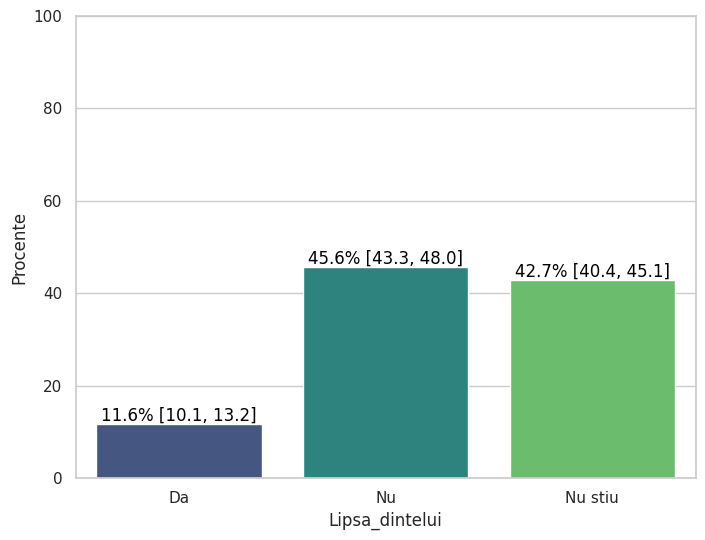

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


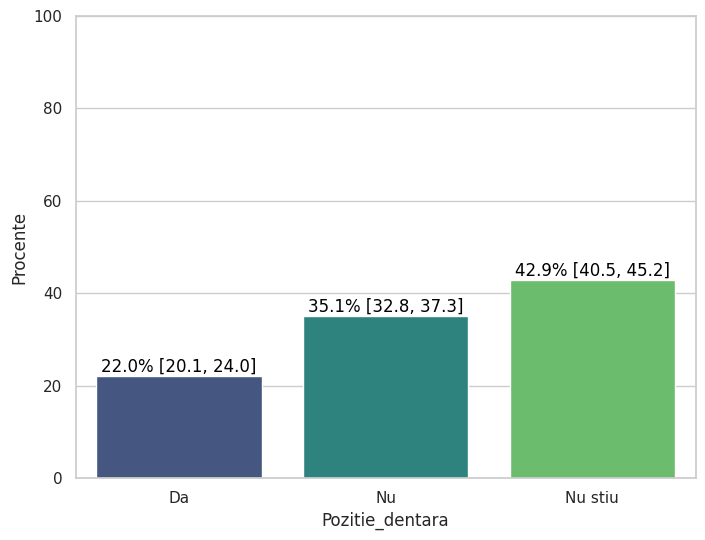

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


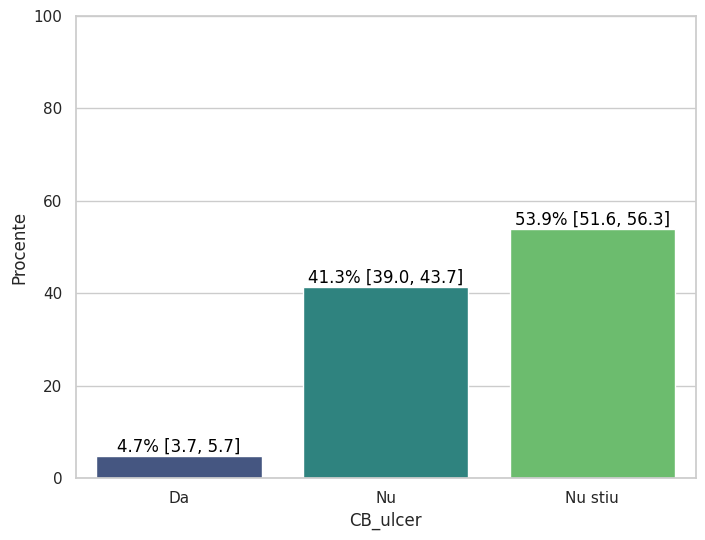

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


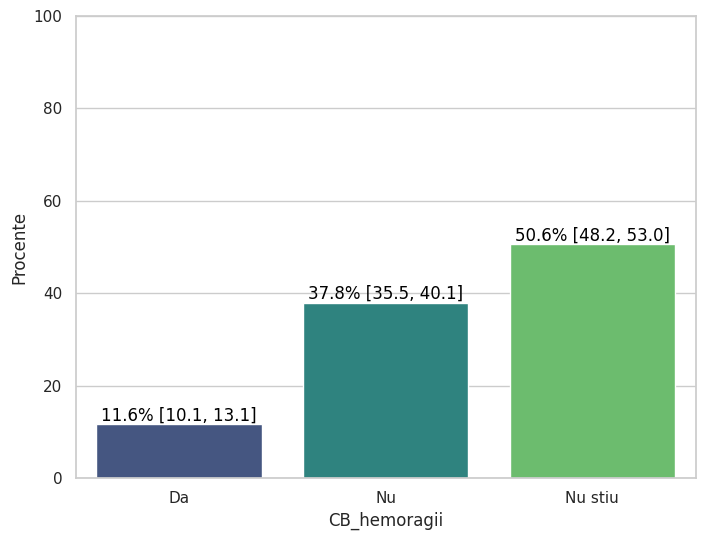

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


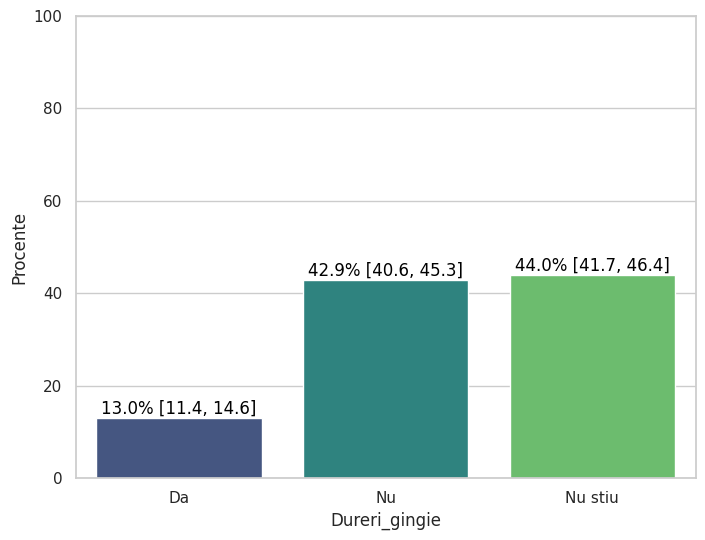

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


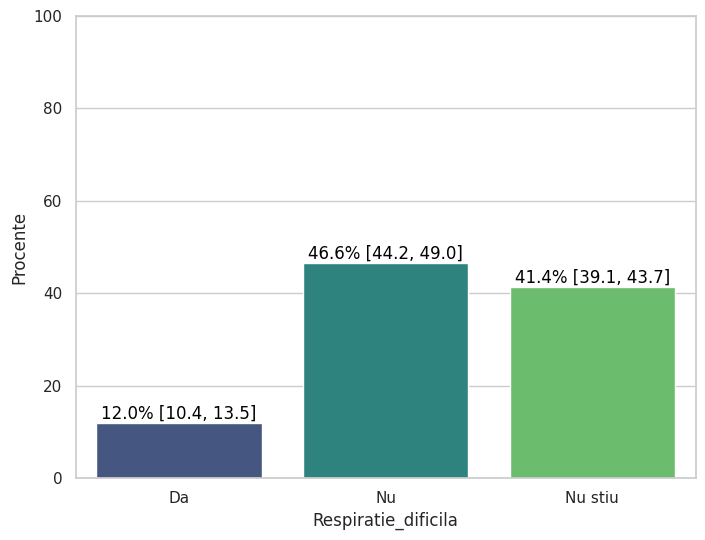

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


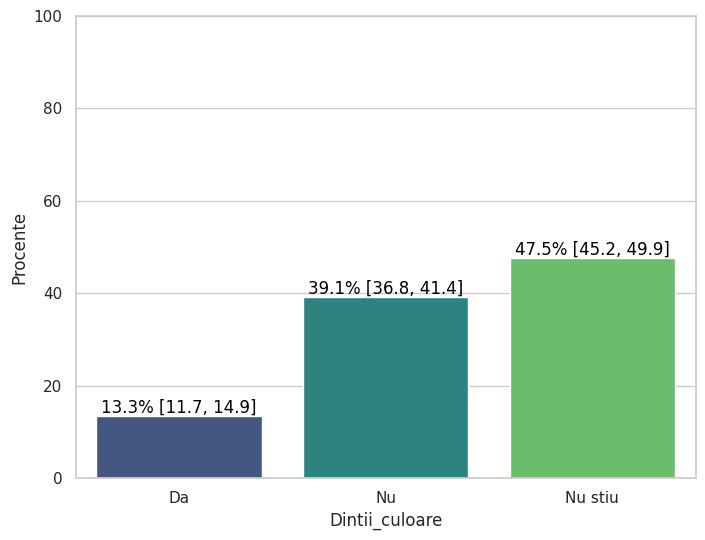

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


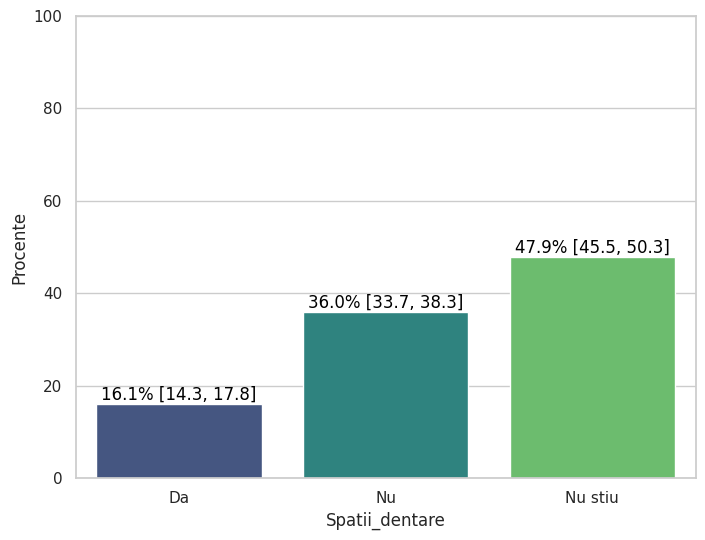

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


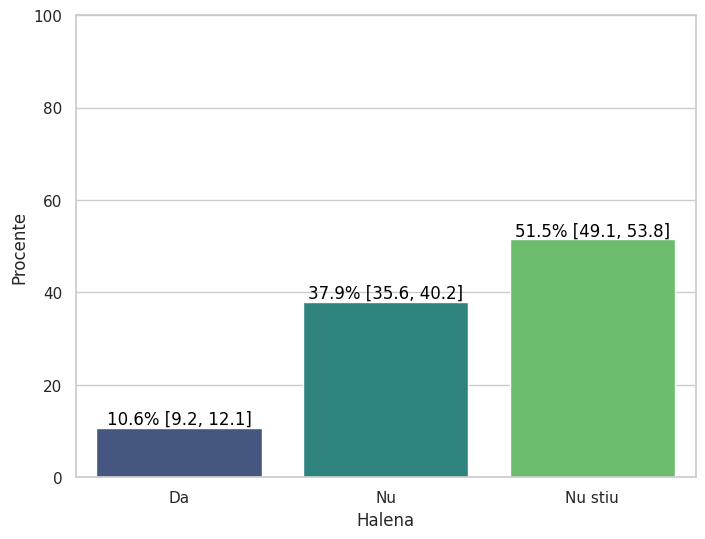

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


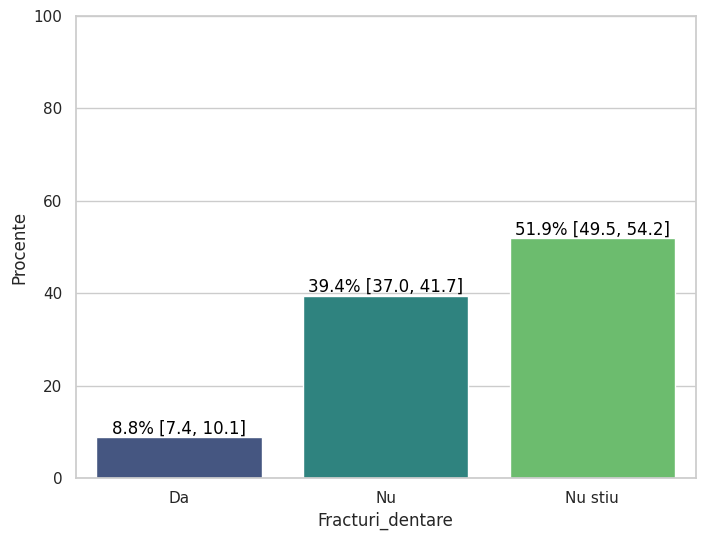

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


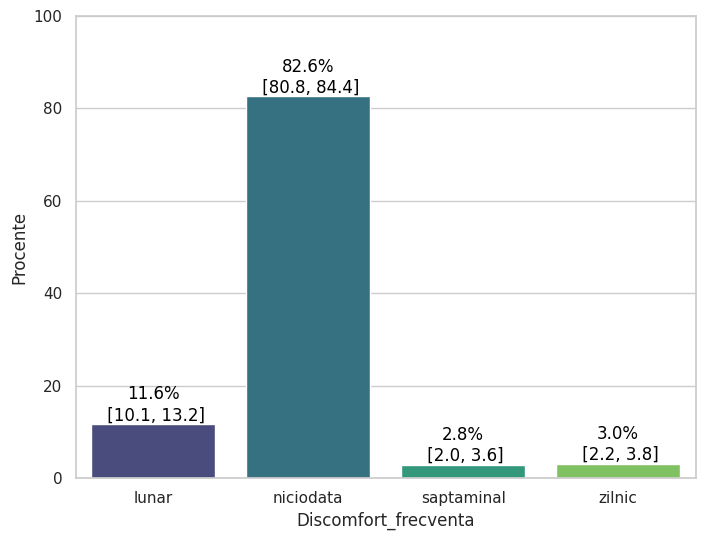

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


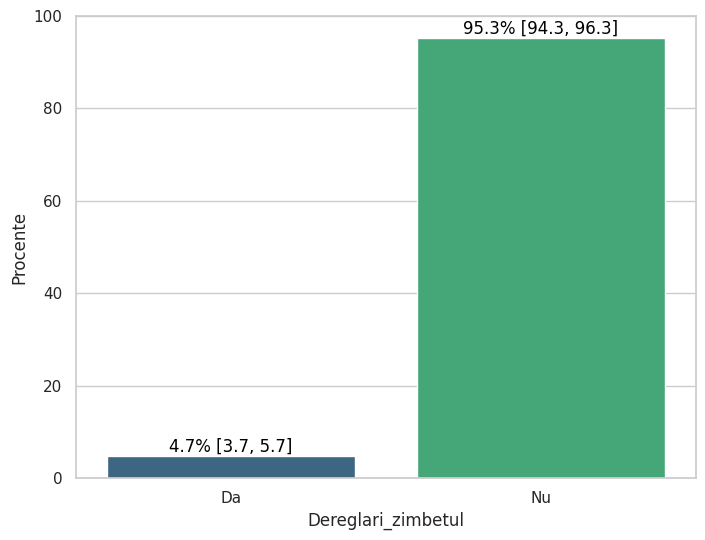

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


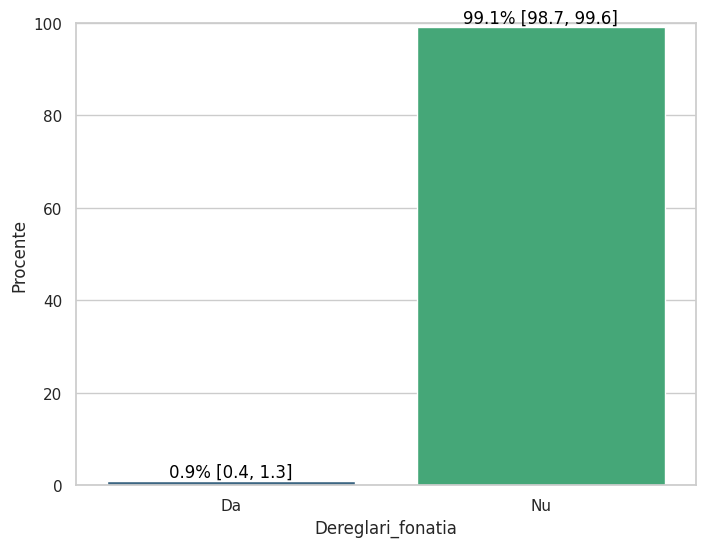

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


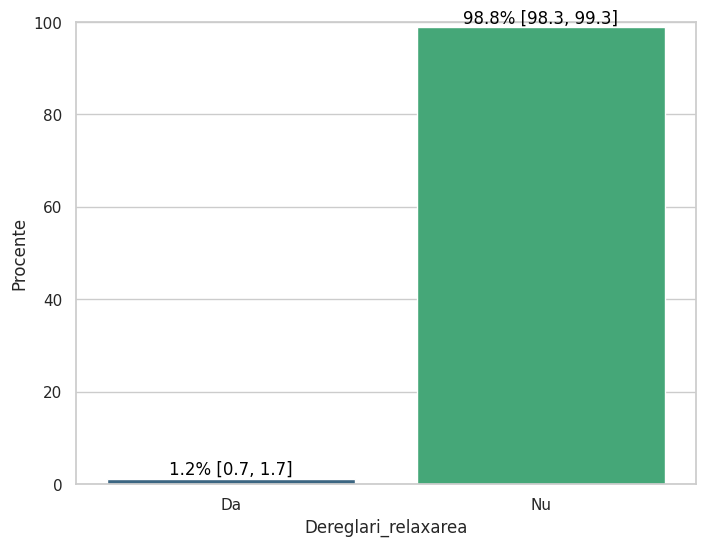

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


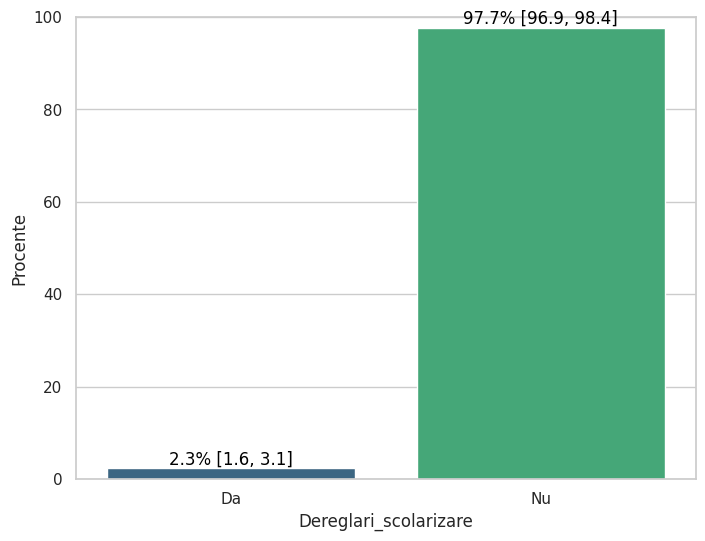

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


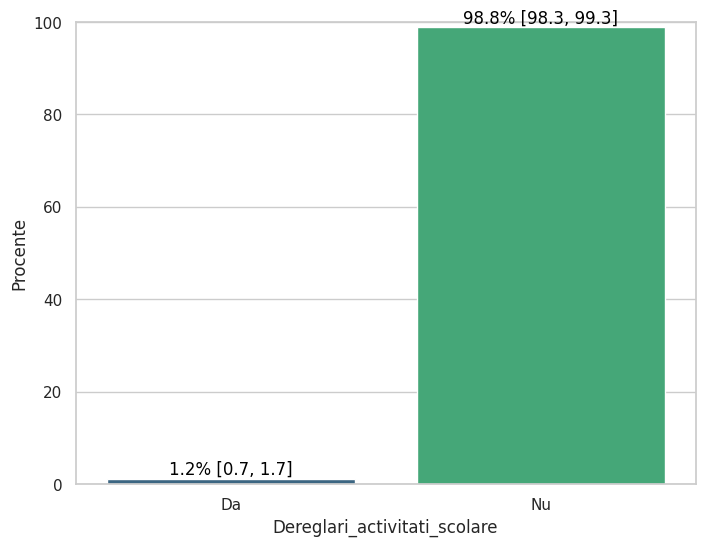

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


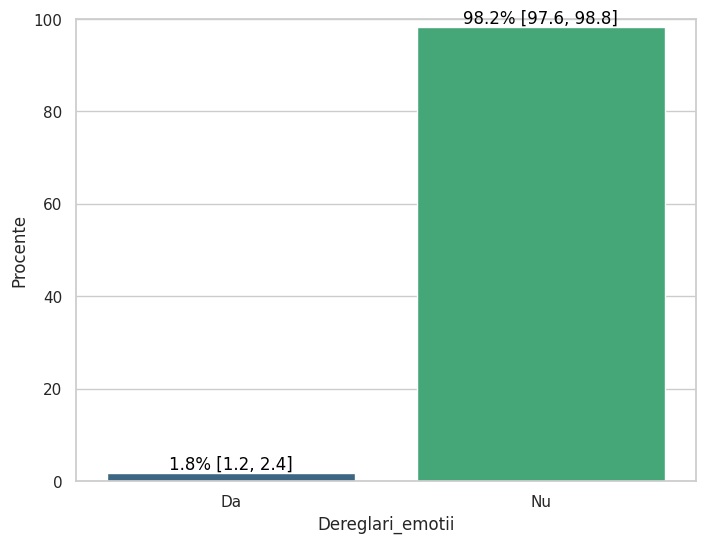

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


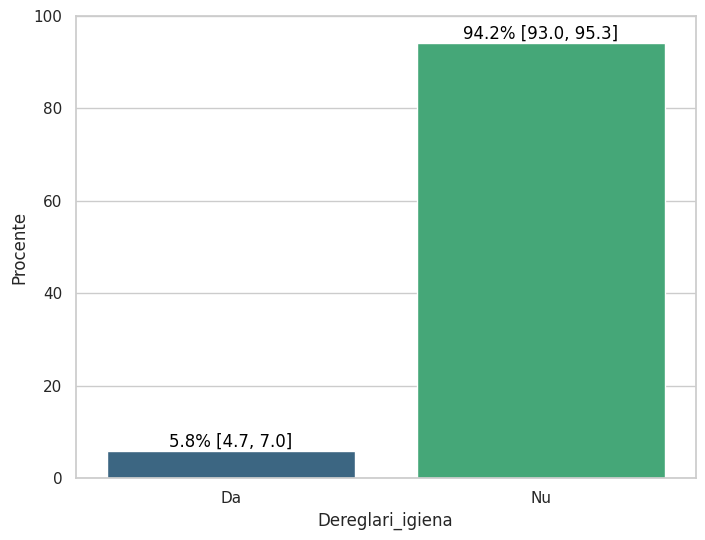

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


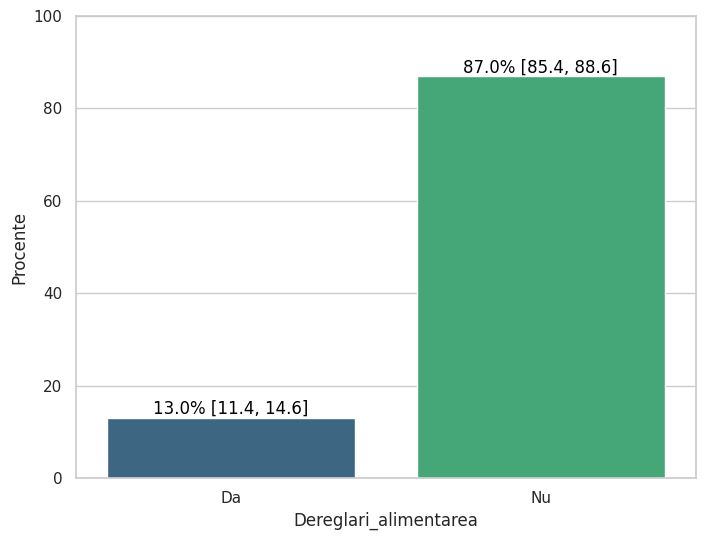

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


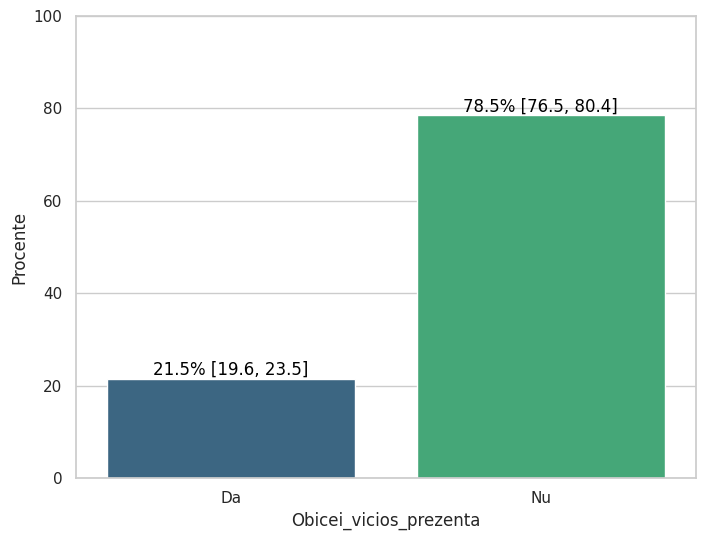

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


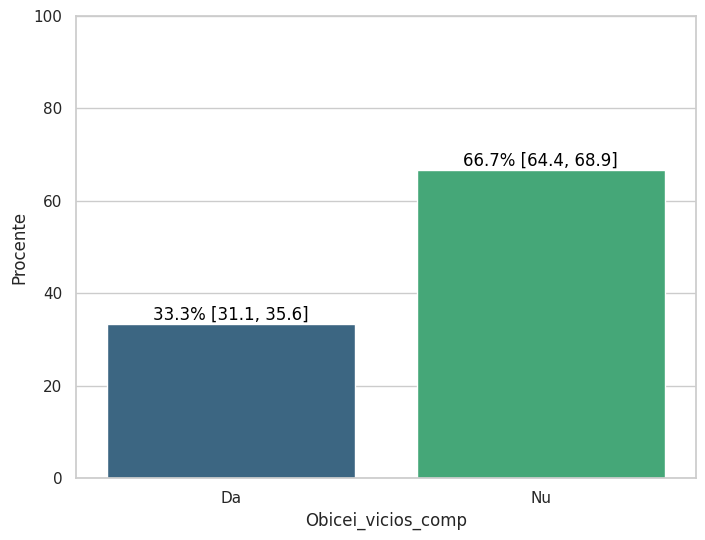

<ipython-input-67-6943c0ceaadd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")


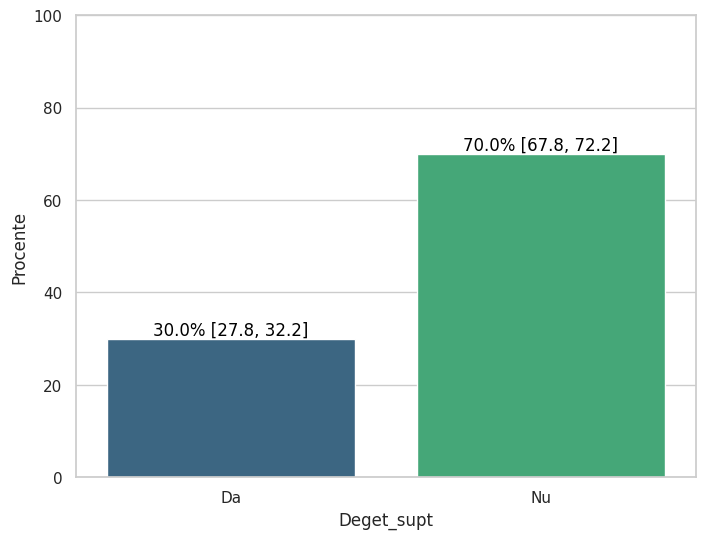

In [ ]:
for el in ['Zona', 'Localitatea', 'Genul', 'Locuinta',
      'Studii_mama', 'Studii_tata', 'Parintii_statut', 'Durere_dentara',
       'Dinte_sensibil', 'Lipsa_dintelui', 'Pozitie_dentara', 'CB_ulcer',
       'CB_hemoragii', 'Dureri_gingie', 'Respiratie_dificila',
       'Dintii_culoare', 'Spatii_dentare', 'Halena', 'Fracturi_dentare',
       'Discomfort_frecventa', 'Dereglari_zimbetul', 'Dereglari_fonatia',
       'Dereglari_relaxarea', 'Dereglari_scolarizare',
       'Dereglari_activitati_scolare', 'Dereglari_emotii', 'Dereglari_igiena',
       'Dereglari_alimentarea', 'Obicei_vicios_prezenta', 'Obicei_vicios_comp',
       'Deget_supt']:
  bar_plot_cat (el, df)


In [ ]:
round(df.describe(), 1)

,Clasa,Dupa_Virsta
count,1710.0,1710.0
mean,6.4,1.7
std,2.4,0.9
min,1.0,1.0
25%,5.0,1.0
50%,7.0,1.0
75%,8.0,2.0
max,12.0,8.0


In [ ]:
df.to_csv('Trifan_Valentina.csv', index=False)

# Corelations

In [10]:
import pandas as pd

In [38]:
df = pd.read_excel('/content/Trifan_Valentina_BAZA_2.xlsx')

In [47]:
data = df[["NL", "PD", "SPAS", "MAS", "PAS min", "IAS",
           "LPW", "PL", "PT", "MPH",
           "ANB",  "Wits", "FMA", "h_faciala_ant", "h_faciala_post", "corelatia_h_faciala"]]

data.columns = ["NL", "PD", "SPAS", "MAS", "PAS min", "IAS",
                "LPW", "PL", "PT", "MPH",
                "ANB",  "Wits", "FMA", "h_fac_a", "h_fac_p", "cor_h_fac"]


In [13]:
data.shape

(209, 16)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


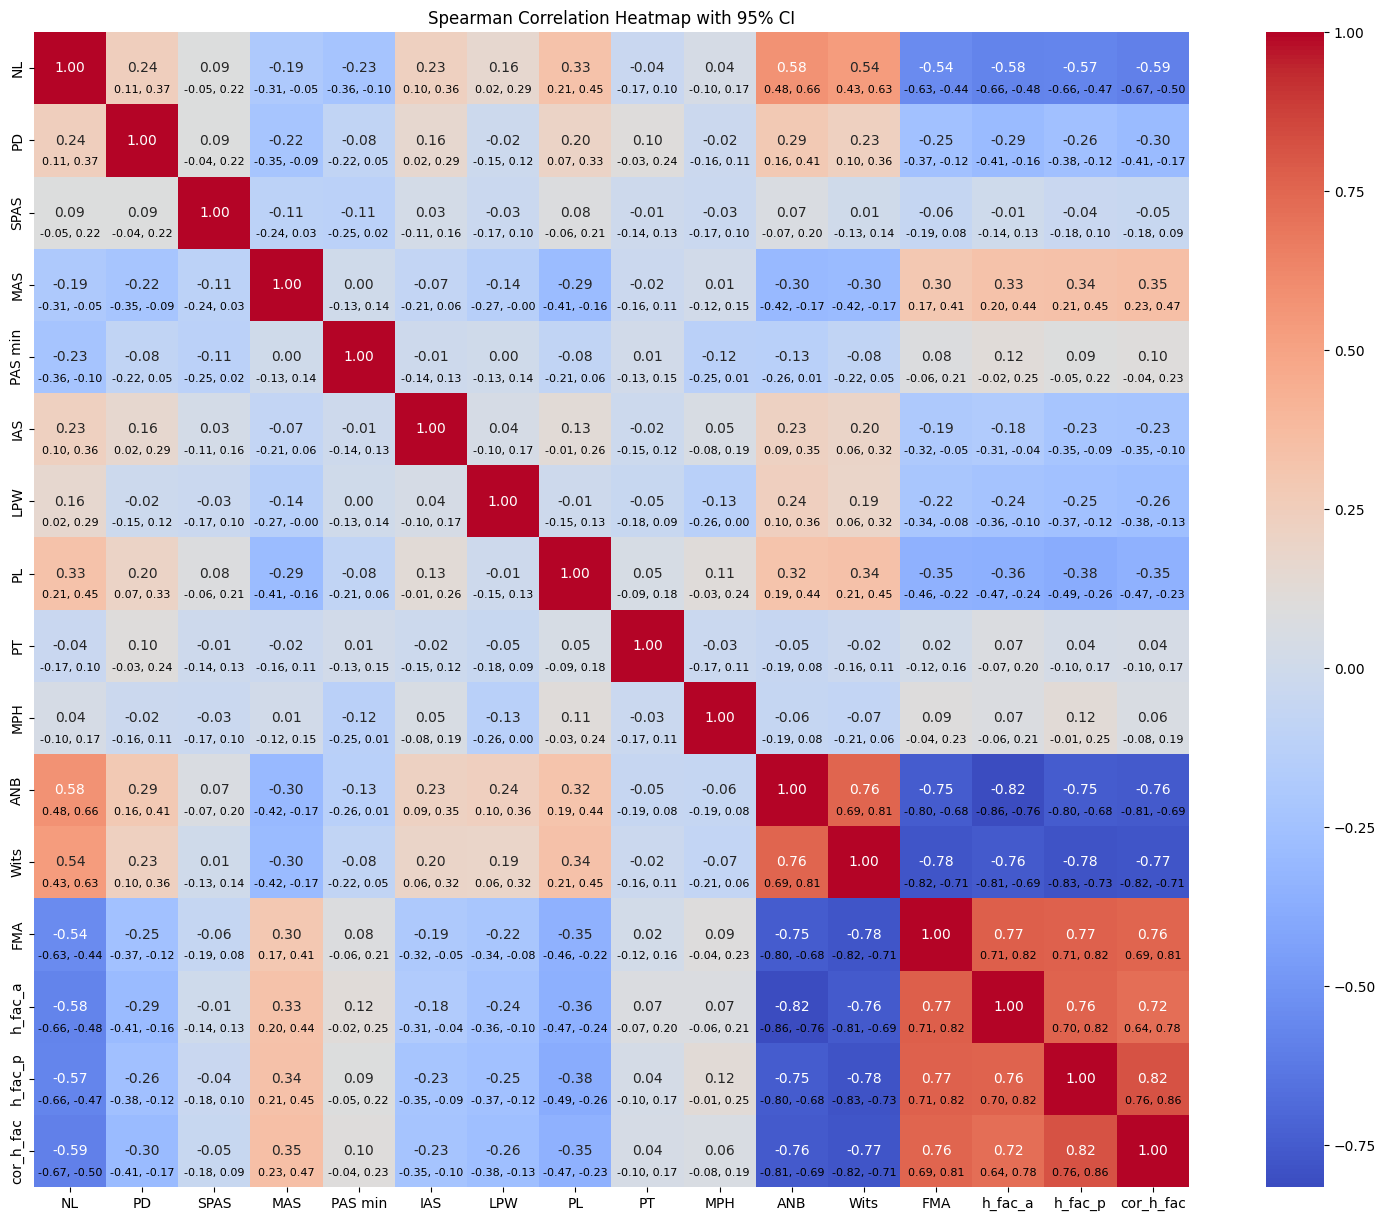

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate Spearman correlation coefficients
spearman_corr = data.corr(method='spearman')

# Sample size
n = len(data)
# Standard error
stderr = 1.0 / np.sqrt(n - 3)
# Z-score for 95% confidence interval
z_score = norm.ppf(0.975)

# Compute confidence intervals for each correlation coefficient
ci_low_matrix = np.tanh(np.arctanh(spearman_corr) - z_score * stderr)
ci_high_matrix = np.tanh(np.arctanh(spearman_corr) + z_score * stderr)

# # Create a mask for non-significant results
# mask = (ci_low_matrix < 0.01) & (ci_high_matrix > -0.01)

# # Replace non-significant values with NaN
# spearman_corr[mask] = np.nan

# Create heatmap with confidence intervals
plt.figure(figsize=(20, 15))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add confidence intervals as annotations
for i in range(spearman_corr.shape[0]):
    for j in range(spearman_corr.shape[1]):
      if i != j:
        ci_low = ci_low_matrix.iloc[i, j]
        ci_high = ci_high_matrix.iloc[i, j]
        annotation = f"{ci_low:.2f}, {ci_high:.2f}"
        plt.text(j + 0.5, i + 0.8, annotation, ha='center', va='center', color='black', fontsize=8)

plt.title('Spearman Correlation Heatmap with 95% CI')
plt.show()


In [52]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr

# # Assuming you have data loaded into a DataFrame named 'data'

# # Number of bootstrap samples
# num_bootstraps = 1000

# # Function to calculate Spearman correlation coefficient with bootstrapping
# def bootstrap_spearman(data1, data2):
#     indices = np.arange(len(data1))
#     spearman_coeffs = []
#     for _ in range(num_bootstraps):
#         # Bootstrap resampling with replacement
#         bootstrap_indices = np.random.choice(indices, size=len(data1), replace=True)
#         bootstrap_data1 = data1.iloc[bootstrap_indices]
#         bootstrap_data2 = data2.iloc[bootstrap_indices]
#         # Calculate Spearman correlation coefficient for the bootstrap sample
#         spearman_coeff, _ = spearmanr(bootstrap_data1, bootstrap_data2)
#         spearman_coeffs.append(spearman_coeff)
#     # Compute 95% confidence interval
#     ci_low = np.percentile(spearman_coeffs, 2.5)
#     ci_high = np.percentile(spearman_coeffs, 97.5)
#     return ci_low, ci_high

# # Calculate Spearman correlation coefficients with 95% confidence intervals
# correlation_matrix = data.corr(method='spearman')
# ci_low_matrix = pd.DataFrame(index=data.columns, columns=data.columns, dtype=float)
# ci_high_matrix = pd.DataFrame(index=data.columns, columns=data.columns, dtype=float)

# for col1 in data.columns:
#     for col2 in data.columns:
#         ci_low, ci_high = bootstrap_spearman(data[col1], data[col2])
#         ci_low_matrix.loc[col1, col2] = ci_low
#         ci_high_matrix.loc[col1, col2] = ci_high

# # Create heatmap with confidence intervals
# plt.figure(figsize=(20, 15))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# # Add confidence intervals as annotations
# for i in range(correlation_matrix.shape[0]):
#     for j in range(correlation_matrix.shape[1]):
#       if i != j:
#         ci_low = ci_low_matrix.iloc[i, j]
#         ci_high = ci_high_matrix.iloc[i, j]
#         annotation = f"{ci_low:.2f}, {ci_high:.2f}"
#         plt.text(j + 0.5, i + 0.8, annotation, ha='center', va='center', color='black', fontsize=8)

# plt.title('Spearman Correlation Heatmap with 95% CI')
# plt.show()
